## Task 1

### Importing Libraries

In [1]:
from datasets import load_dataset
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
# Load the MNIST dataset from the datasets library
mnist = load_dataset('mnist')
print(mnist)

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 60000
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 10000
    })
})


In [3]:
def preprocess(data):
    images = np.array(data['image']) / 255.0 ; # Normalize the pixel values
    images = images.reshape(images.shape[0],-1) # Flatten the images
    labels = np.array(data['label'])
    return images, labels

X_train, y_train = preprocess(mnist['train'])
X_test, y_test = preprocess(mnist['test'])

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


In [4]:
indices = np.random.choice(X_train.shape[0], 200, replace=False) # Randomly sample 200 images
X_labeled , y_labeled = X_train[indices], y_train[indices]

mask = np.ones(X_train.shape[0], dtype=bool)
mask[indices] = False
X_unlabeled, y_unlabeled = X_train[mask], y_train[mask]

print(f'Labeled: {X_train.shape}, {y_train.shape}')
print(f'Unlabeled: {X_unlabeled.shape}, {y_unlabeled.shape}')

Labeled: (60000, 784), (60000,)
Unlabeled: (59800, 784), (59800,)


## Task 2

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
clf = RandomForestClassifier(n_estimators=100,random_state=0)
clf.fit(X_labeled, y_labeled)

(60000, 784) (60000,)
(10000, 784) (10000,)
Labeled: (60000, 784), (60000,)
Unlabeled: (59800, 784), (59800,)


RandomForestClassifier(random_state=0)

Iteration 1, Accuracy: 0.80
Iteration 2, Accuracy: 0.79
Iteration 3, Accuracy: 0.80
Iteration 4, Accuracy: 0.80
Iteration 5, Accuracy: 0.80
Iteration 6, Accuracy: 0.80
Iteration 7, Accuracy: 0.79
Iteration 8, Accuracy: 0.79
Iteration 9, Accuracy: 0.80
Iteration 10, Accuracy: 0.80
Iteration 11, Accuracy: 0.80
Iteration 12, Accuracy: 0.80
Iteration 13, Accuracy: 0.80
Iteration 14, Accuracy: 0.80
Iteration 15, Accuracy: 0.80
Iteration 16, Accuracy: 0.80
Iteration 17, Accuracy: 0.81
Iteration 18, Accuracy: 0.80
Iteration 19, Accuracy: 0.81
Iteration 20, Accuracy: 0.80


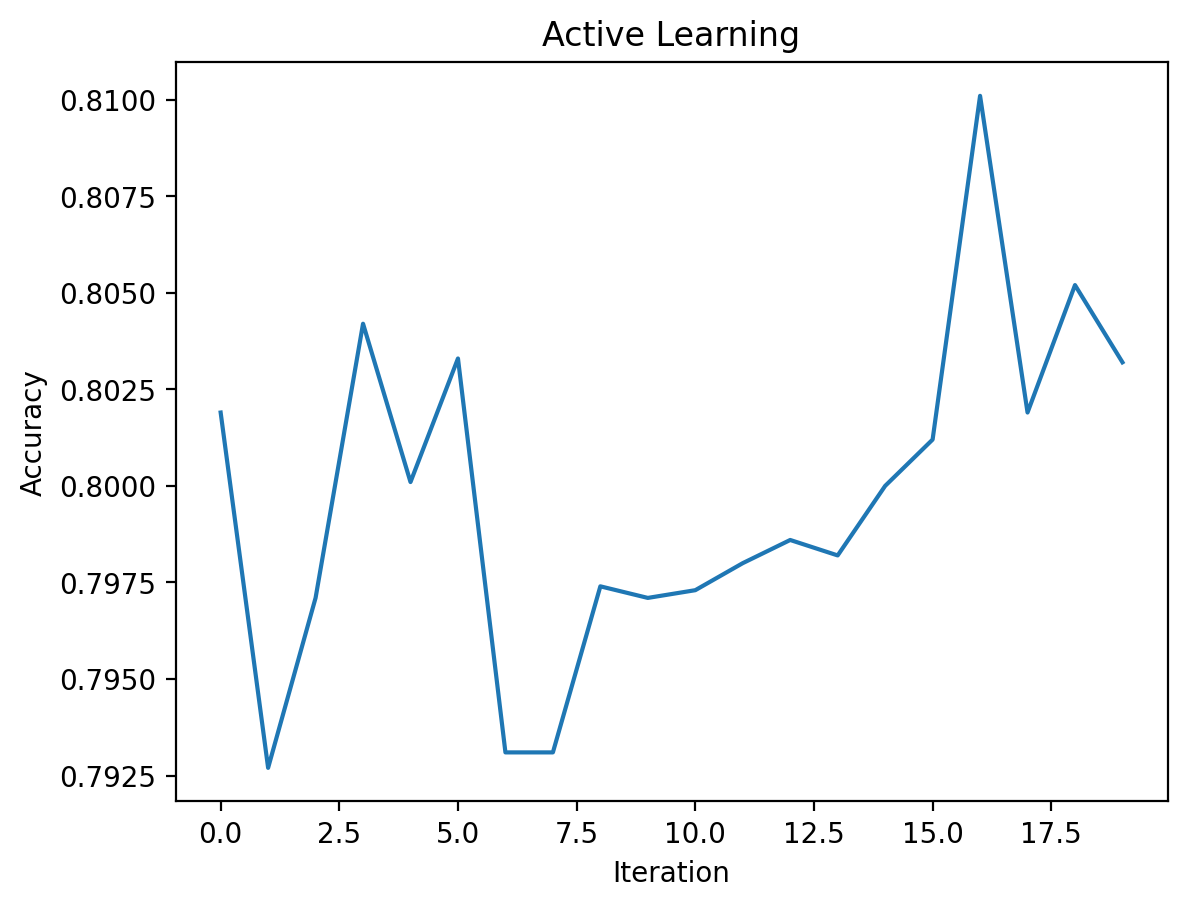

In [8]:
accuracies = []
for i in range(20):
    # Randomly sample an image from the unlabeled dataset
    index = np.random.choice(X_unlabeled.shape[0])
    X_sample = X_unlabeled[index]
    y_sample = y_unlabeled[index]

    # Add the newly labeled sample to the labeled dataset
    X_labeled = np.vstack([X_labeled, X_sample])
    y_labeled = np.hstack([y_labeled, y_sample])

    # Remove the newly labeled sample from the unlabeled dataset
    X_unlabeled = np.delete(X_unlabeled, index, axis=0)
    y_unlabeled = np.delete(y_unlabeled, index)

    # Retrain the classifier
    clf.fit(X_labeled, y_labeled)

    # Evaluate the classifier
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    print(f'Iteration {i+1}, Accuracy: {acc:.2f}')


plt.plot(accuracies)
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Active Learning')
plt.show()


## Task 3

(60000, 784) (60000,)
(10000, 784) (10000,)
Labeled: (60000, 784), (60000,)
Unlabeled: (59800, 784), (59800,)
Iteration 1, Accuracy: 0.79
Iteration 2, Accuracy: 0.79
Iteration 3, Accuracy: 0.79
Iteration 4, Accuracy: 0.80
Iteration 5, Accuracy: 0.80
Iteration 6, Accuracy: 0.79
Iteration 7, Accuracy: 0.80
Iteration 8, Accuracy: 0.80
Iteration 9, Accuracy: 0.80
Iteration 10, Accuracy: 0.80
Iteration 11, Accuracy: 0.80
Iteration 12, Accuracy: 0.80
Iteration 13, Accuracy: 0.81
Iteration 14, Accuracy: 0.81
Iteration 15, Accuracy: 0.80
Iteration 16, Accuracy: 0.80
Iteration 17, Accuracy: 0.79
Iteration 18, Accuracy: 0.80
Iteration 19, Accuracy: 0.79
Iteration 20, Accuracy: 0.79


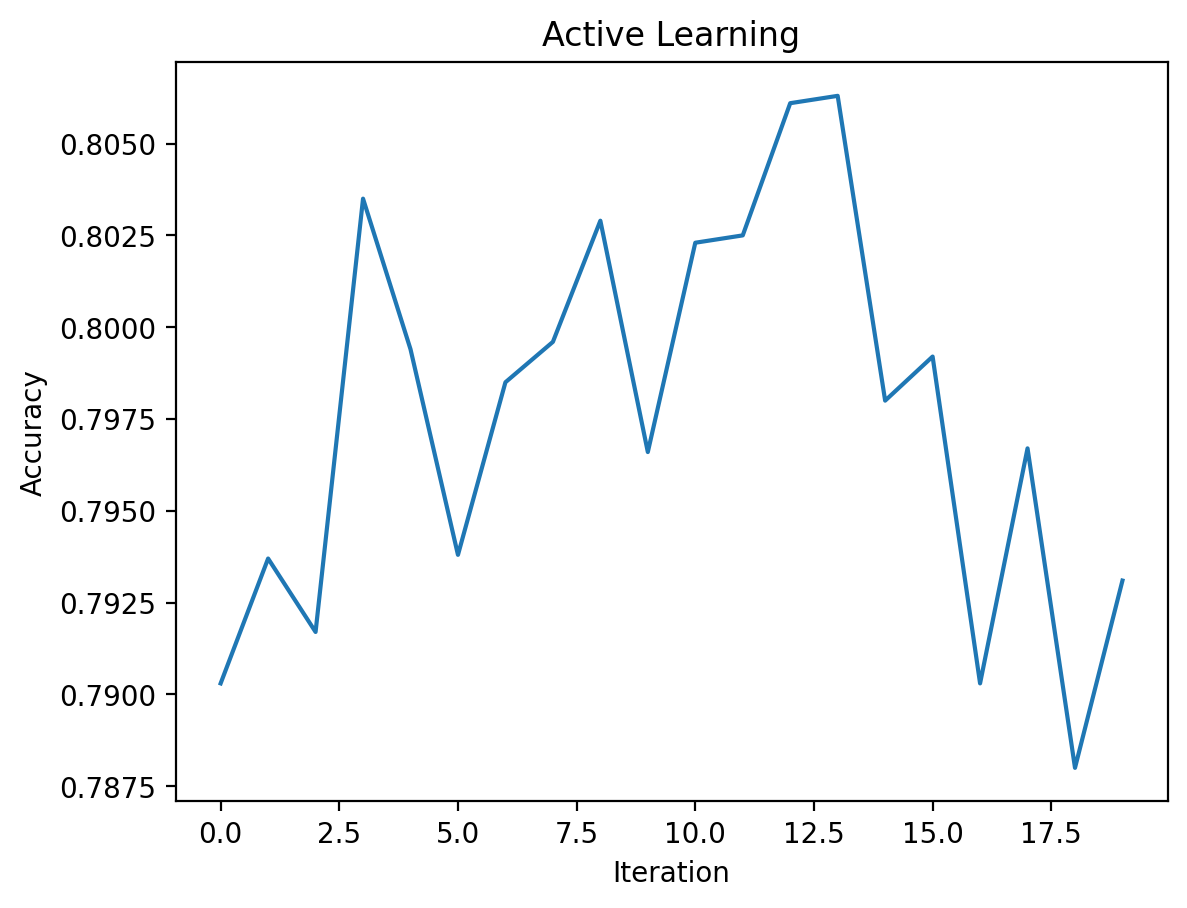

In [ ]:
def compute_label_entropy(probs):
    entropy = -np.sum(probs * np.log(probs + 1e-10))
    return entropy

clf = RandomForestClassifier(n_estimators=100,random_state=0)
clf.fit(X_labeled, y_labeled)

accuracies = []
for i in range(20):
    # Compute the class probabilities for each sample in the unlabeled dataset
    probs = clf.predict_proba(X_unlabeled)

    # Compute the entropy for each sample
    entropies = np.array([compute_label_entropy(p) for p in probs])

    # Select the sample with the highest entropy - most uncertain prediction
    index = np.argmax(entropies)
    X_sample = X_unlabeled[index]
    y_sample = y_unlabeled[index]

    # Add the newly labeled sample to the labeled dataset
    X_labeled = np.vstack([X_labeled, X_sample])
    y_labeled = np.hstack([y_labeled, y_sample])

    # Remove the newly labeled sample from the unlabeled dataset
    X_unlabeled = np.delete(X_unlabeled, index, axis=0)
    y_unlabeled = np.delete(y_unlabeled, index)

    # Retrain the classifier
    clf.fit(X_labeled, y_labeled)

    # Evaluate the classifier
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    print(f'Iteration {i+1}, Accuracy: {acc:.2f}')

plt.plot(accuracies)
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Active Learning')
plt.show()

## Task 4

In [ ]:
from sklearn.utils import resample , shuffle

committee = [RandomForestClassifier(n_estimators=100, random_state=0) for _ in range(5)]

